---
# GWP2 GPN4175 GM: Yhasreen, Oratile, Ebenezer
---

## Data Sources
### Scenario 1 and 2

1. Financial Ombudsman Service. (2021). Annual complaints data [annual-complaints-data-2020-21]. Retrieved from https://www.financial-ombudsman.org.uk/data-insight/annual-complaints-data

2. Federal Reserve Bank of St. Louis. (2023). Delinquency Rate on Credit Card Loans, All Commercial Banks. Retrieved from https://fred.stlouisfed.org/series/DRCCLACBS

3. Federal Reserve Bank of St. Louis. (2023). Large Bank Consumer Credit Card Balances: Utilization: Active Accounts Only: 90th Percentile. Retrieved from https://fred.stlouisfed.org/series/RCCCBACTIVEUTILPCT90

4. Federal Reserve Bank of St. Louis. (2023). Consumer Debt Service Payments as a Percent of Disposable Personal Income. Retrieved from https://fred.stlouisfed.org/series/CDSP

5. Federal Reserve Bank of St. Louis. (2023). Large Bank Consumer Credit Card Balances: Current Credit Score: 50th Percentile. Retrieved from https://fred.stlouisfed.org/series/RCCCBSCOREPCT50

6. Federal Reserve Bank of St. Louis. (2023). U.S.-Chartered Depository Institutions; Consumer Credit, Credit Cards; Asset, Transactions. Retrieved from https://fred.stlouisfed.org/series/BOGZ1FA763066113Q

7. Federal Reserve Bank of St. Louis. (2023).30-Year Fixed Rate Conforming Mortgage Index: Loan-to-Value Greater Than 80, FICO Score Between 720 and 739. Retrieved from https://fred.stlouisfed.org/series/OBMMIC30YFLVGT80FB720A739

8. Federal Reserve Bank of St. Louis. (2023). All-Transactions House Price Index for the United States. Retrieved from https://fred.stlouisfed.org/series/USSTHPI

9. Federal Reserve Bank of St. Louis. (2023). Mortgage Debt Service Payments as a Percent of Disposable Personal Income. Retrieved from https://fred.stlouisfed.org/series/MDSP

10. Federal Reserve Bank of St. Louis. (2023). Real Estate Loans: Commercial Real Estate Loans: Construction and Land Development Loans, All Commercial Banks. Retrieved from https://fred.stlouisfed.org/series/CLDACMB027SBOG


In [1]:
# import libraries
import pandas_datareader as pdr
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

yf.pdr_override()

# Using code from FRED API: Get US Economic Data using Python

def get_fred_data(param_list, start_date, end_date):
    df = pdr.DataReader(param_list, "fred", start_date, end_date)
    return df.reset_index()


In [2]:
pip install fredapi

https://fred.stlouisfed.org/series/

In [3]:
from fredapi import Fred

fred = Fred(api_key='7490f681c7eb037113b1a75963b074db')


## Scenario 1

Individual Credit and Financial Data can not be obtained due to data privacy. However publicly available aggregate financial/credit data can be obtained

#### Delinquency Rate on Credit Card Loans, All Commercial Banks

Credit Card Delinquency Rates: These rates provide insights into the percentage of credit card borrowers who are late in making their payments. It can help assess the credit risk associated with lending to individuals.

In [4]:
# Delinquency Rate on Credit Card Loans, All Commercial Banks
delinquency_rates = fred.get_series('DRCCLACBS')

In [5]:
df_delinquency = pd.DataFrame(delinquency_rates)

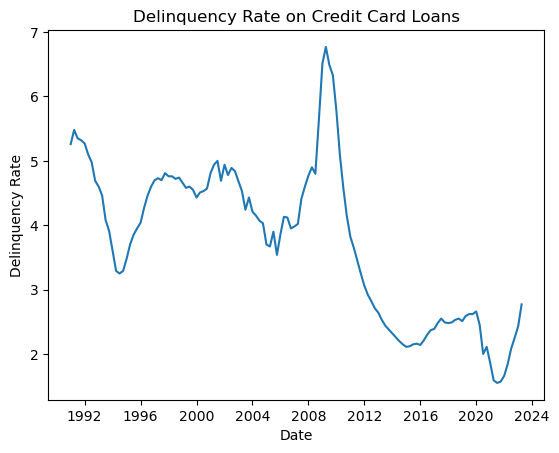

In [6]:
# Plotting the delinquency rates
plt.plot(df_delinquency.index, df_delinquency[0])

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Delinquency Rate')
plt.title('Delinquency Rate on Credit Card Loans')

# Display the plot
plt.show()

The line plot visualizes the trend of delinquency rates on credit card loans over time. It provides a concise representation of the historical delinquency rate fluctuations, allowing lenders to assess the stability and risk associated with lending credit cards.

#### Credit Utilization Rate

In [7]:
# Large Bank Consumer Credit Card Balances: Utilization: Active Accounts Only: 90th Percentile
credit_utilization_rate = fred.get_series('RCCCBACTIVEUTILPCT90')

In [8]:
df_utilization = pd.DataFrame(credit_utilization_rate)

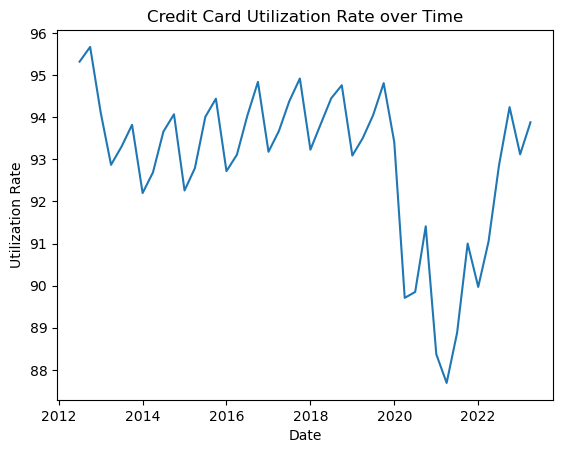

In [9]:
import matplotlib.pyplot as plt

# Line plot
plt.plot(df_utilization.index, df_utilization[0])
plt.xlabel('Date')
plt.ylabel('Utilization Rate')
plt.title('Credit Card Utilization Rate over Time')
plt.show()


#### Consumer Debt Service Payments as a Percent of Disposable Personal Income

In [10]:
# Consumer Debt Service Payments as a Percent of Disposable Personal Income
consumer_debt_income = fred.get_series('CDSP')

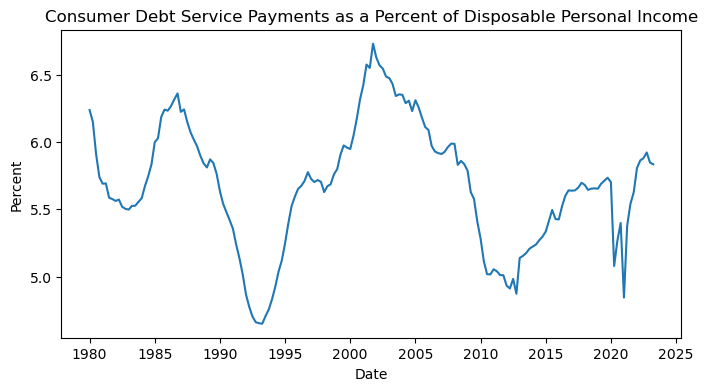

In [11]:
plt.figure(figsize=(8, 4))
plt.plot(consumer_debt_income)
plt.title("Consumer Debt Service Payments as a Percent of Disposable Personal Income")
plt.xlabel("Date")
plt.ylabel("Percent")
plt.show()

#### Large Bank Consumer Credit Card Balances: Current Credit Score: 50th Percentile

In [12]:
# Large Bank Consumer Credit Card Balances: Current Credit Score: 50th Percentile
consumer_credit_score = fred.get_series('RCCCBSCOREPCT50')

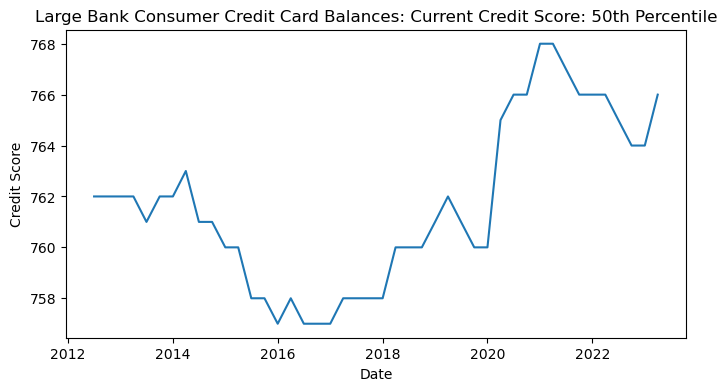

In [13]:
plt.figure(figsize=(8, 4))
plt.plot(consumer_credit_score)
plt.title("Large Bank Consumer Credit Card Balances: Current Credit Score: 50th Percentile")
plt.xlabel("Date")
plt.ylabel("Credit Score")
plt.show()

#### U.S.-Chartered Depository Institutions; Consumer Credit, Credit Cards; Asset, Transactions

In [14]:
# U.S.-Chartered Depository Institutions; Consumer Credit, Credit Cards; Asset, Transactions
depository_institutions_creditcard_transactions = fred.get_series('BOGZ1FA763066113Q')

In [15]:
df_depository_credit_card_trans = pd.DataFrame(depository_institutions_creditcard_transactions)

In [16]:
df_depository_credit_card_trans.dropna(inplace=True)

In [17]:
df_depository_credit_card_trans = df_depository_credit_card_trans[df_depository_credit_card_trans[0]>0]

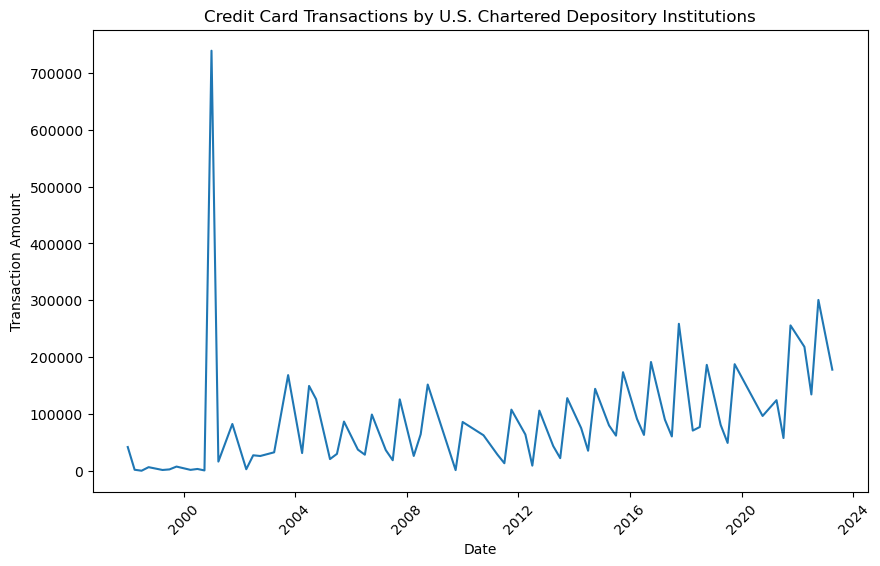

In [18]:
# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(df_depository_credit_card_trans.index, df_depository_credit_card_trans[0])

# Customizing the chart
plt.title('Credit Card Transactions by U.S. Chartered Depository Institutions')
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)

# Displaying the chart
plt.show()


#### Annual complaints data and insight 2020/21

Source: Financial Ombudsman Service
https://www.financial-ombudsman.org.uk/data-insight/annual-complaints-data

In [20]:
df = pd.read_excel('annual-complaints-data-2020-21.xlsx')
print(df.head())

                               Sector           Product group  Enquiries
0  Payment protection insurance total                     NaN      51490
1          Banking and payments total                     NaN     118842
2                Banking and payments  Personal bank accounts      54253
3                Banking and Payments    Credit card accounts      23556
4                Banking and Payments        Payment services      14585


In [21]:
df = df[df['Sector'] == 'Consumer credit']

In [22]:
df

,Sector,Product group,Enquiries
10,Consumer credit,Loans,79233
11,Consumer credit,Finance linked to goods and services,27411
12,Consumer credit,Credit services,5172
13,Consumer credit,Debt services,3707


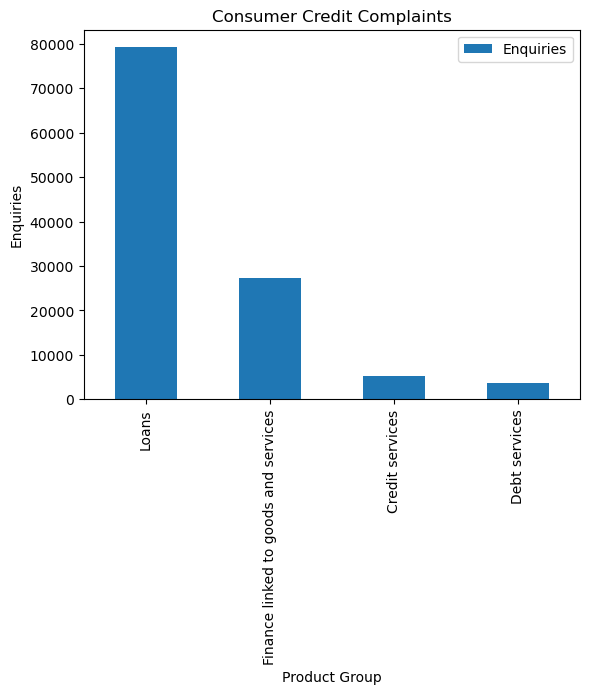

In [23]:
# Create the bar plot
df.plot(x='Product group', y='Enquiries', kind='bar')

# Add labels and title
plt.xlabel('Product Group')
plt.ylabel('Enquiries')
plt.title('Consumer Credit Complaints')

# Display the plot
plt.show()

## Scenerio 2

#### Mortgage loan-to-value

In [24]:
# 30-Year Fixed Rate Conforming Mortgage Index: Loan-to-Value Greater Than 80, FICO Score Between 720 and 739
mortgage_index_720_739 = fred.get_series('OBMMIC30YFLVGT80FB720A739')
df_mortgage_index_720_739 = pd.DataFrame(mortgage_index_720_739)

# 30-Year Fixed Rate Conforming Mortgage Index: Loan-to-Value Less Than or Equal to 80, FICO Score Greater Than 740
mortgage_index_740 = fred.get_series('OBMMIC30YFLVLE80FGE740')
df_mortgage_index_740 = pd.DataFrame(mortgage_index_740)

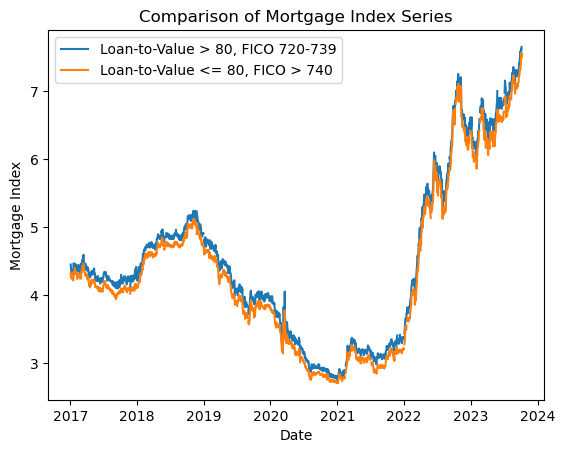

In [25]:
import matplotlib.pyplot as plt

# Plotting the first mortgage index series
plt.plot(df_mortgage_index_720_739.index, df_mortgage_index_720_739[0], label='Loan-to-Value > 80, FICO 720-739')

# Plotting the second mortgage index series
plt.plot(df_mortgage_index_740.index, df_mortgage_index_740[0], label='Loan-to-Value <= 80, FICO > 740')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Mortgage Index')
plt.title('Comparison of Mortgage Index Series')
plt.legend()

# Displaying the plot
plt.show()


### Housing Market Indicators

https://fred.stlouisfed.org/series/

In [26]:
house_price_index = fred.get_series('USSTHPI')

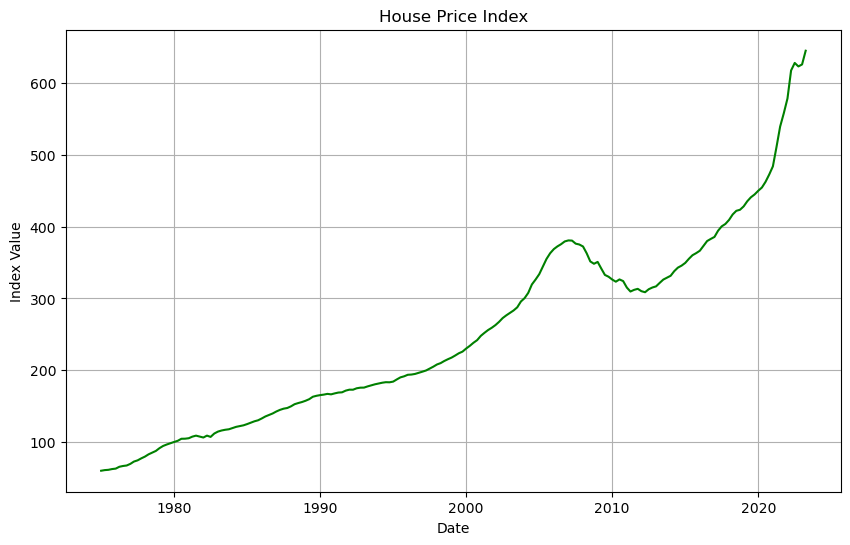

In [27]:
# Plotting House Price Index
plt.figure(figsize=(10, 6))
plt.plot(house_price_index, color='green')
plt.title('House Price Index')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.grid(True)
plt.show()

#### Mortgage Debt Service Payments as a Percent of Disposable Personal Income

In [28]:
mortgage_debt_income = fred.get_series('MDSP')

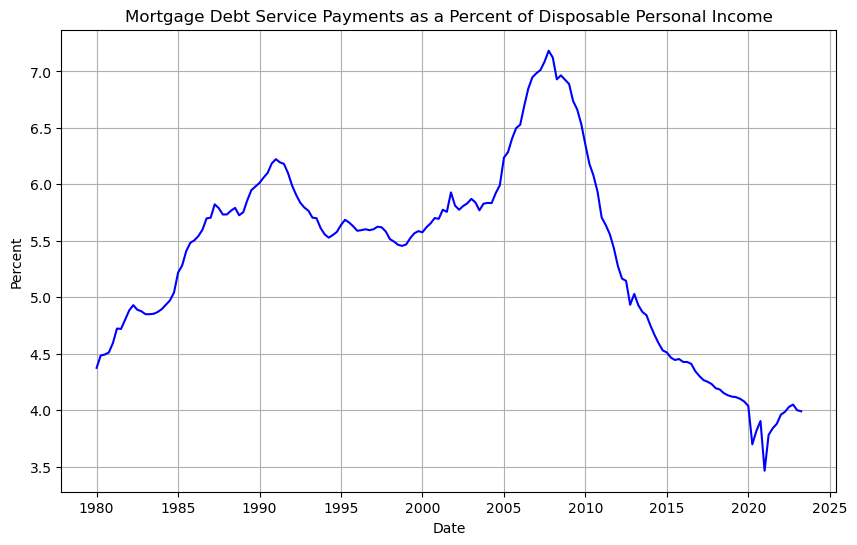

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(mortgage_debt_income, color='blue')
plt.title('Mortgage Debt Service Payments as a Percent of Disposable Personal Income')
plt.xlabel('Date')
plt.ylabel('Percent')
plt.grid(True)
plt.show()

# SCENARIO 3

In [9]:

!pip install fredapi

import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from fredapi import fred
import yfinance as yfin

In [10]:
def analyze_scenario_data(scenario_name, fred_codes, api_key=None):
    
    # Define the start date as January 1, 2011
    start_date = datetime.date(2011, 1, 1)
    
    api_key = 'ce98731c794e3fd998a3b93a6b8cee5b'
    
    # Define the end date as the current date
    end_date = datetime.date.today()

    # Fetch the data from FRED using the API for each code
    data = {}
    for fred_code in fred_codes:
        data[fred_code] = web.DataReader(fred_code, "fred", start_date, end_date, api_key=api_key)

    # Display the first few rows of the data for each dataset
    for fred_code, dataset in data.items():
        print(f"{scenario_name} - {fred_code} Data:")
        print(dataset.head())


        # Draw all three graphs for other scenarios
        for fred_code, dataset in data.items():
            plt.figure(figsize=(10, 6))
            
             # Distribution of the data (histogram)
            plt.figure(figsize=(10, 6))
            sns.histplot(data=dataset, x=fred_code, bins=20, kde=True)
            plt.xlabel(f"{scenario_name} - {fred_code} Data")
            plt.ylabel("Frequency")
            plt.title(f"Distribution of {scenario_name} - {fred_code} Data")
 
            # Scatterplot
            plt.figure(figsize=(10, 6))
            sns.scatterplot(data=dataset, x=dataset.index, y=fred_code)
            plt.xlabel("Year")
            plt.ylabel(f"{scenario_name} - {fred_code} Data")
            plt.title(f"Scatterplot: {scenario_name} - {fred_code} Data over Time")
            
            # Plotting the data over time (time series plot)
            plt.figure(figsize=(10, 6))
            plt.plot(dataset.index, dataset[fred_code])
            plt.xlabel("Year")
            plt.ylabel(f"{scenario_name} - {fred_code} Data")
            plt.title(f"{scenario_name} - {fred_code} Data Over Time")
            plt.grid(True)

            plt.tight_layout()
            plt.show()



Scenario 3: Construction Loan Analysis - TTLCONS Data:
             TTLCONS
DATE                
2011-01-01  759964.0
2011-02-01  758376.0
2011-03-01  769157.0
2011-04-01  769437.0
2011-05-01  775251.0


<Figure size 1000x600 with 0 Axes>

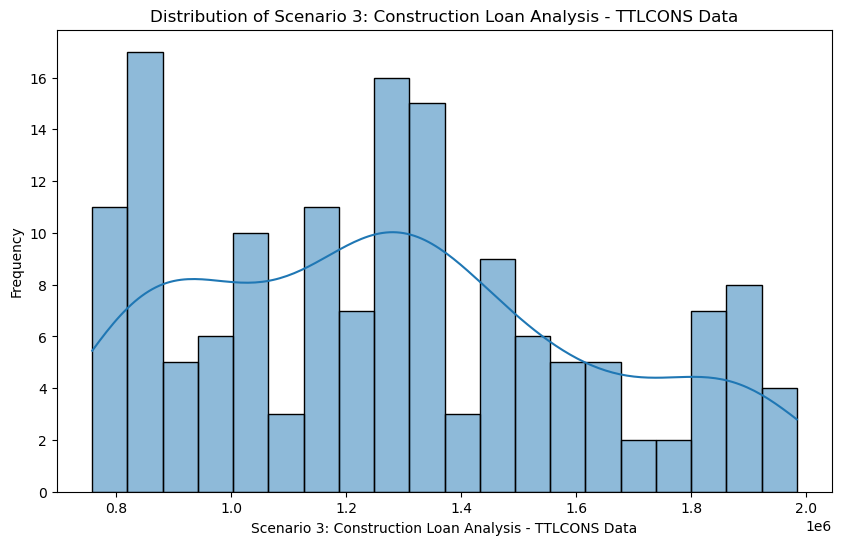

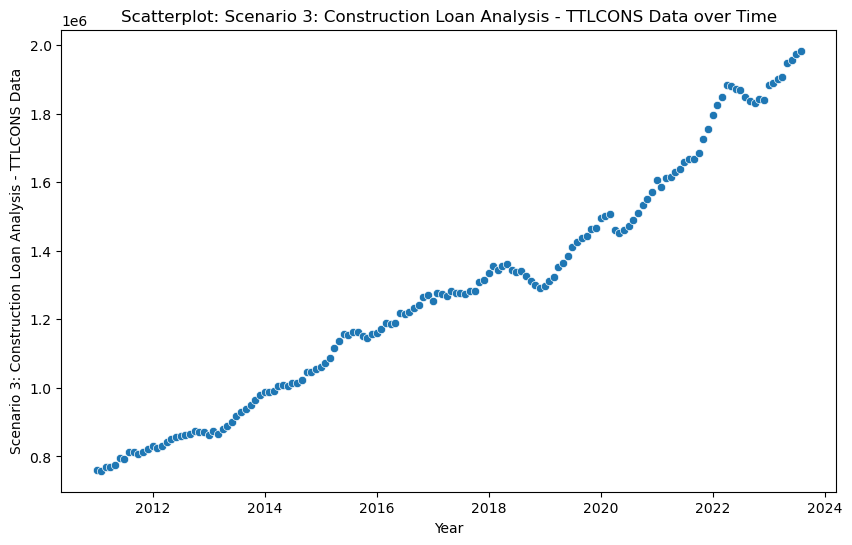

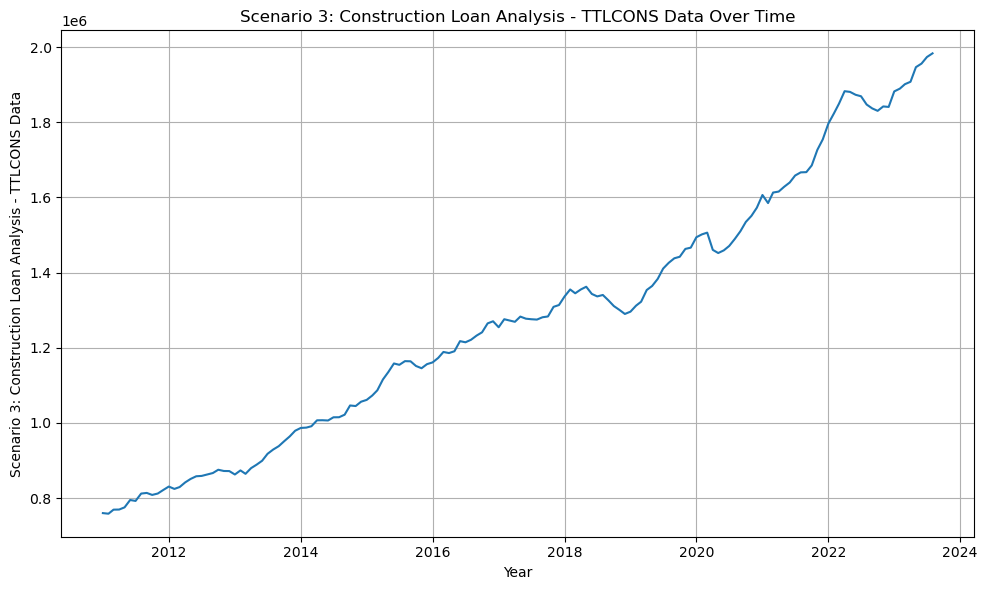

In [11]:
analyze_scenario_data(scenario_name='Scenario 3: Construction Loan Analysis', fred_codes=['TTLCONS'])

---
# 4. Equity: AAPL

---
### 4ai. Currency and Interest Rates

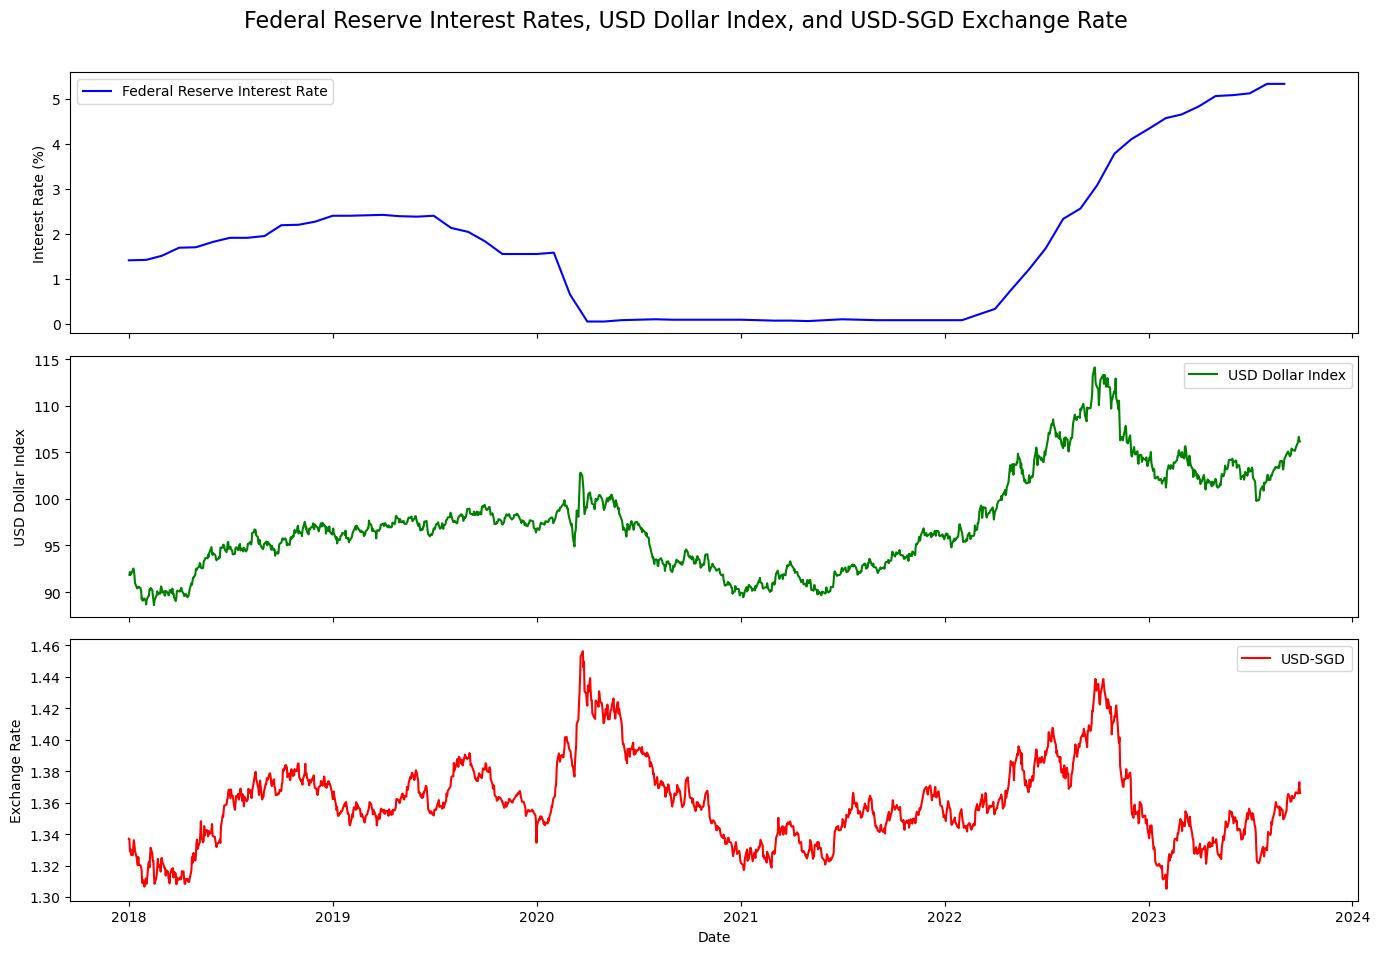

In [13]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data

# Define date range
start_date = '2018-01-01'
end_date = '2023-10-01'

# Fetch USD-SGD exchange rate data using Yahoo Finance
usd_sgd = yf.download('SGD=X', start=start_date, end=end_date ,progress=False)['Close']

# Fetch USD Dollar Index data using Yahoo Finance
usd_index = yf.download('DX-Y.NYB', start=start_date, end=end_date ,progress=False)['Close']

# Fetch Federal Reserve interest rates data using FRED
# Effective Federal Funds Rate (FRED code: FEDFUNDS)
try:
    import pandas_datareader as pdr
    interest_rate = pdr.get_data_fred('FEDFUNDS', start=start_date, end=end_date)['FEDFUNDS']
except ImportError:
    print("The pandas_datareader library is not installed. Please install it to fetch the FRED data.")

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(14, 10), sharex=True)
fig.suptitle('Federal Reserve Interest Rates, USD Dollar Index, and USD-SGD Exchange Rate', fontsize=16)

# Plot Federal Reserve interest rates
axs[0].plot(interest_rate, label='Federal Reserve Interest Rate', color='blue')
axs[0].set_ylabel('Interest Rate (%)')
axs[0].legend()

# Plot USD Dollar Index
axs[1].plot(usd_index, label='USD Dollar Index', color='green')
axs[1].set_ylabel('USD Dollar Index')
axs[1].legend()

# Plot USD-SGD exchange rate
axs[2].plot(usd_sgd, label='USD-SGD', color='red')
axs[2].set_ylabel('Exchange Rate')
axs[2].legend()

# Common x-axis label
plt.xlabel('Date')
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

### 4aii. Interest Rates and Currency Rates

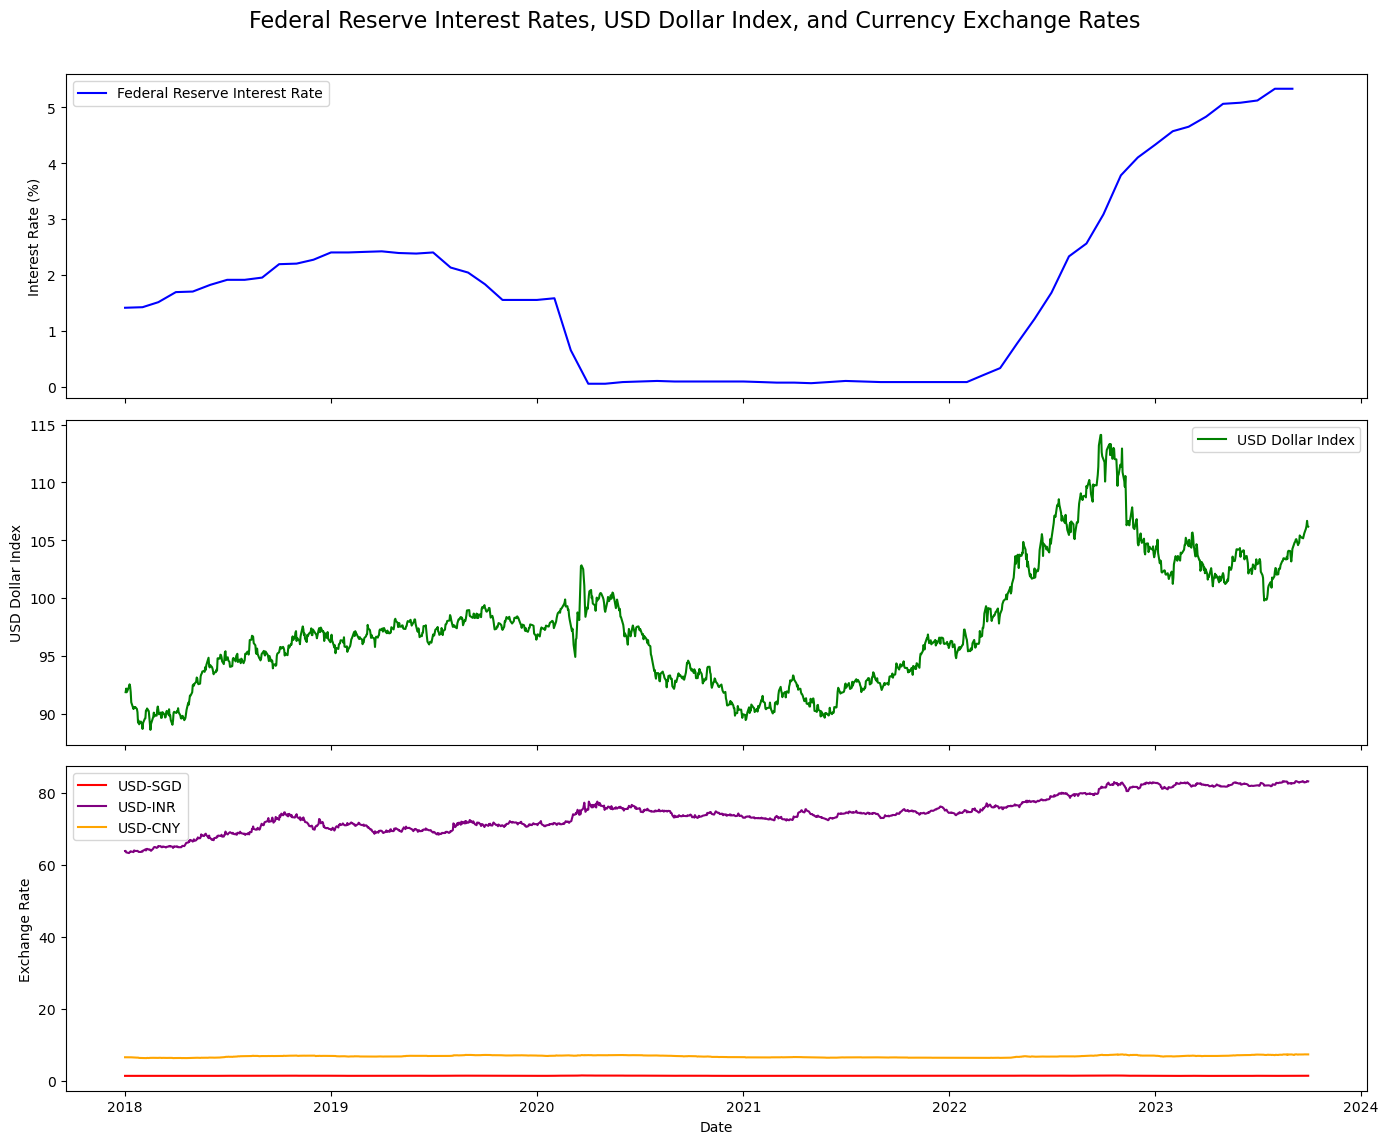

In [14]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Define date range
start_date = '2018-01-01'
end_date = '2023-10-01'

# Fetch USD-SGD exchange rate data using Yahoo Finance
usd_sgd = yf.download('SGD=X', start=start_date, end=end_date ,progress=False)['Close']

# Fetch USD-INR exchange rate data using Yahoo Finance
usd_inr = yf.download('INR=X', start=start_date, end=end_date, progress=False)['Close']

# Fetch USD-CNY exchange rate data using Yahoo Finance
usd_cny = yf.download('CNY=X', start=start_date, end=end_date, progress=False)['Close']

# Fetch USD Dollar Index data using Yahoo Finance
usd_index = yf.download('DX-Y.NYB', start=start_date, end=end_date ,progress=False)['Close']

# Fetch Federal Reserve interest rates data using FRED
# Effective Federal Funds Rate (FRED code: FEDFUNDS)
try:
    from pandas_datareader import data
    interest_rate = data.get_data_fred('FEDFUNDS', start=start_date, end=end_date)['FEDFUNDS']
except ImportError:
    print("The pandas_datareader library is not installed. Please install it to fetch the FRED data.")

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(14, 12), sharex=True)
fig.suptitle('Federal Reserve Interest Rates, USD Dollar Index, and Currency Exchange Rates', fontsize=16)

# Plot Federal Reserve interest rates
axs[0].plot(interest_rate, label='Federal Reserve Interest Rate', color='blue')
axs[0].set_ylabel('Interest Rate (%)')
axs[0].legend()

# Plot USD Dollar Index
axs[1].plot(usd_index, label='USD Dollar Index', color='green')
axs[1].set_ylabel('USD Dollar Index')
axs[1].legend()

# Plot USD-SGD exchange rate
axs[2].plot(usd_sgd, label='USD-SGD', color='red')
axs[2].plot(usd_inr, label='USD-INR', color='purple')
axs[2].plot(usd_cny, label='USD-CNY', color='orange')
axs[2].set_ylabel('Exchange Rate')
axs[2].legend()

# Common x-axis label
plt.xlabel('Date')
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

---
### 4b. AAPL Volume and Price spreads

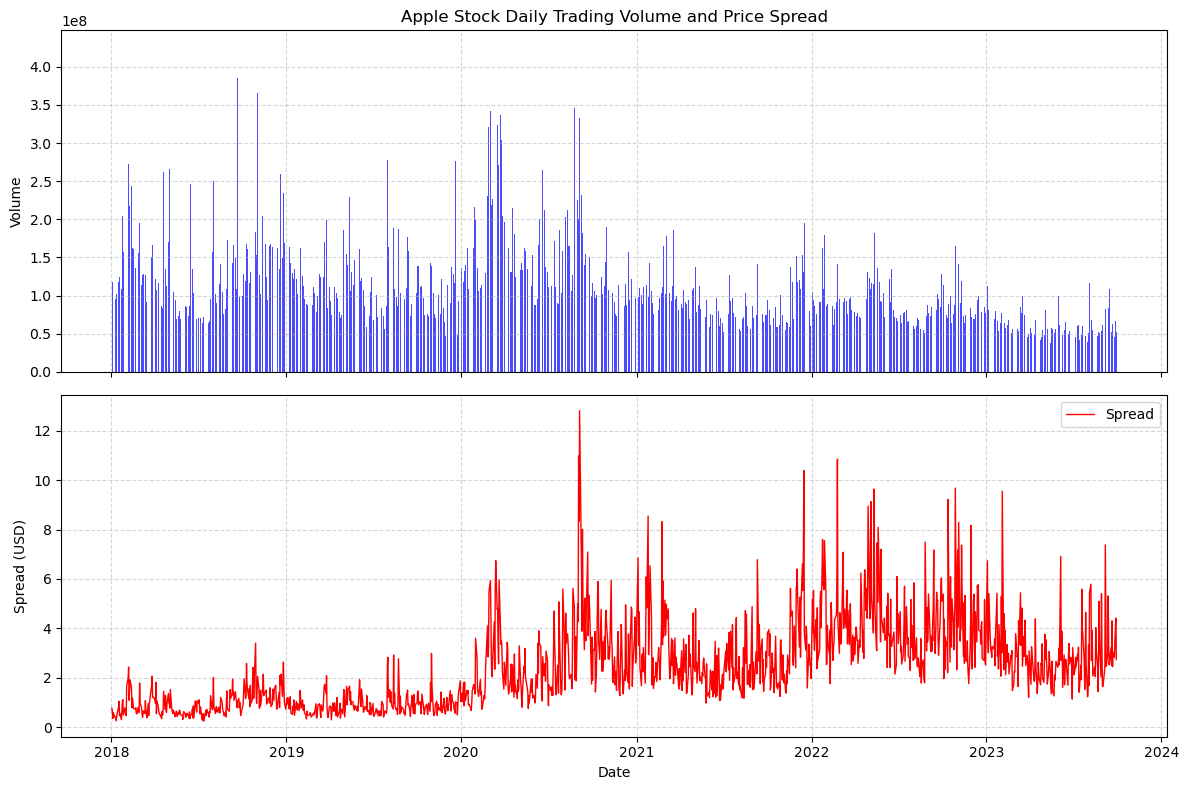

In [16]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the ticker symbol and date range
symbol = 'AAPL'
start_date = '2018-01-01'
end_date = '2023-10-01'

# Fetch the stock data
data = yf.download(symbol, start=start_date, end=end_date ,progress=False)

# Calculate the daily spread
data['Spread'] = data['High'] - data['Low']

# Set up the matplotlib figure and axes
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plotting Volume
ax[0].bar(data.index, data['Volume'], color='blue', alpha=0.7)
ax[0].set_title('Apple Stock Daily Trading Volume and Price Spread')
ax[0].set_ylabel('Volume')
ax[0].grid(True, linestyle='--', alpha=0.5)

# Plotting Spread
ax[1].plot(data.index, data['Spread'], color='red', label='Spread', linewidth=1)
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Spread (USD)')
ax[1].grid(True, linestyle='--', alpha=0.5)
ax[1].legend()

# Adjusting layout and showing the plot
plt.tight_layout()
plt.show()

### 4ci. AAPL Normality or Non Linearity?

[*********************100%%**********************]  1 of 1 completed


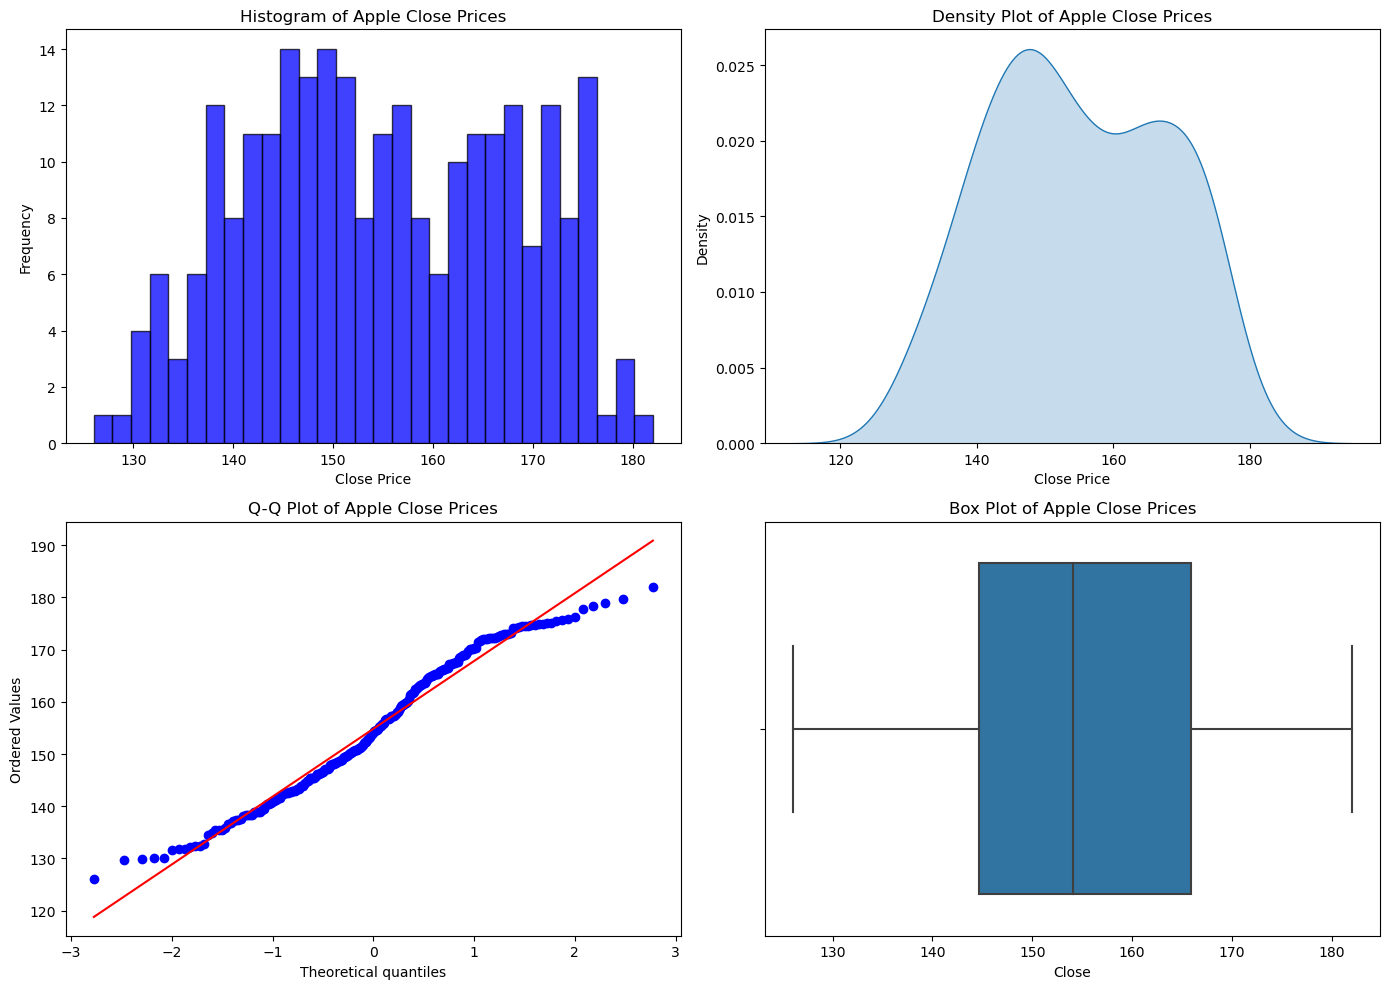

In [18]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas as pd

# Download Apple's stock data
symbol = 'AAPL'
data = yf.download(symbol, start="2022-01-01", end="2023-01-01" ,progress=True)

# Check for any NaN values and handle them
data = data.dropna()

# Extracting Close prices
close_prices = data['Close']

# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plotting the histogram
axes[0, 0].hist(close_prices, bins=30, alpha=0.75, color='b', edgecolor='k')
axes[0, 0].set_title('Histogram of Apple Close Prices')
axes[0, 0].set_xlabel('Close Price')
axes[0, 0].set_ylabel('Frequency')

# Plotting Kernel Density Estimate
sns.kdeplot(close_prices, ax=axes[0, 1], fill=True)
axes[0, 1].set_title('Density Plot of Apple Close Prices')
axes[0, 1].set_xlabel('Close Price')
axes[0, 1].set_ylabel('Density')

# Creating a QQ plot
stats.probplot(close_prices, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot of Apple Close Prices')

# Creating a box plot
sns.boxplot(x=close_prices, ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Apple Close Prices')

# Adjusting layout to prevent overlap
plt.tight_layout()
plt.show()

### 4cii. AAPL Mean, Median, Skewness and Kurtosis

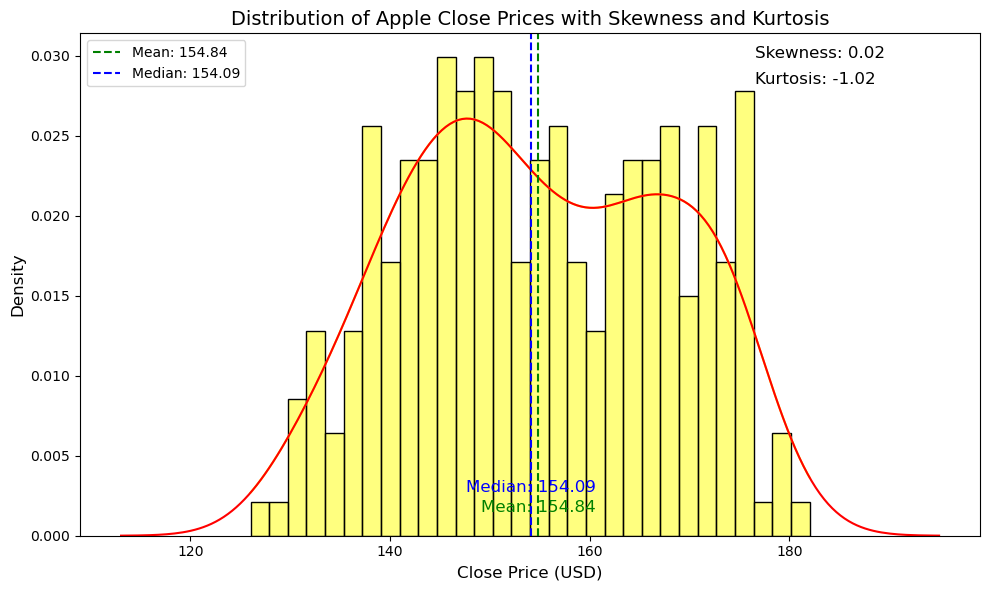

In [19]:
import yfinance as yf
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# Fetch Apple's stock data
symbol = 'AAPL'
data = yf.download(symbol, start="2022-01-01", end="2023-01-01" ,progress=False)

# Handle any NaN values
data = data.dropna()

# Extract Close prices
close_prices = data['Close']

# Measure skewness and kurtosis
skewness = stats.skew(close_prices)
kurtosis = stats.kurtosis(close_prices)

# Calculate mean and median
mean_price = close_prices.mean()
median_price = close_prices.median()

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Plotting the histogram and KDE
sns.histplot(close_prices, kde=True, bins=30, color='yellow', stat='density')
sns.kdeplot(close_prices, color='red')

# Annotating skewness and kurtosis
plt.annotate(f'Skewness: {skewness:.2f}', xy=(0.75, 0.95), xycoords='axes fraction', fontsize=12)
plt.annotate(f'Kurtosis: {kurtosis:.2f}', xy=(0.75, 0.90), xycoords='axes fraction', fontsize=12)

# Adding mean and median lines
plt.axvline(mean_price, color='green', linestyle='--', label=f'Mean: {mean_price:.2f}')
plt.axvline(median_price, color='blue', linestyle='--', label=f'Median: {median_price:.2f}')

# Annotating mean and median
plt.annotate(f'Mean: {mean_price:.2f}', xy=(mean_price, 0.02), xycoords=('data', 'axes fraction'),
             textcoords='offset points', xytext=(0,10), ha='center', fontsize=12, color='green')
plt.annotate(f'Median: {median_price:.2f}', xy=(median_price, 0.06), xycoords=('data', 'axes fraction'),
             textcoords='offset points', xytext=(0,10), ha='center', fontsize=12, color='blue')


# Titling and labeling
plt.title('Distribution of Apple Close Prices with Skewness and Kurtosis', fontsize=14)
plt.xlabel('Close Price (USD)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

# # Print the skewness and kurtosis
# print(f'Skewness of Apple Close Prices: {skewness:.2f}')
# print(f'Kurtosis of Apple Close Prices: {kurtosis:.2f}')

### 4ciii. AAPL and VIX

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


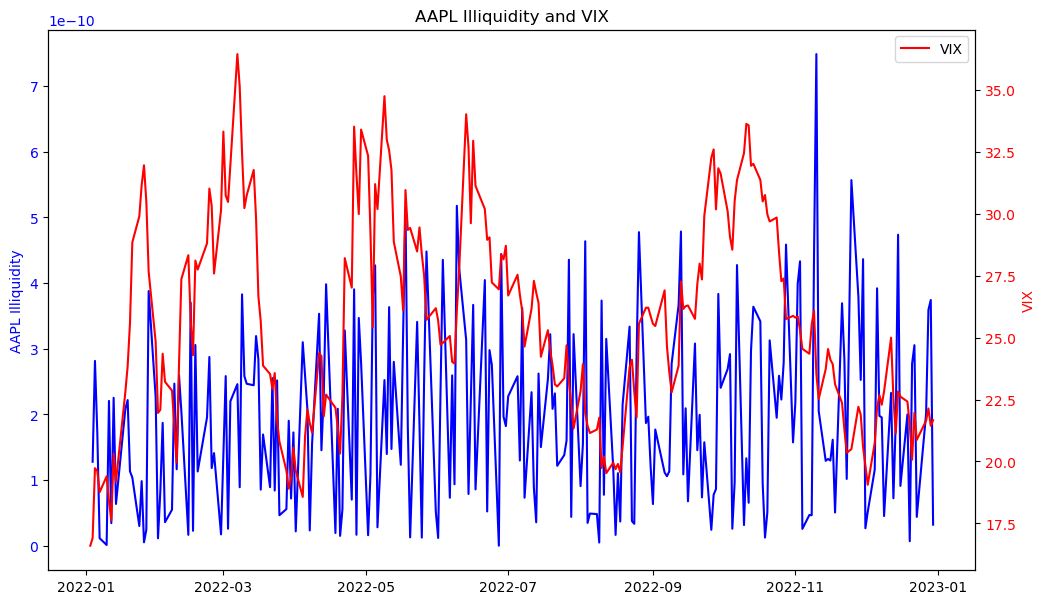

In [20]:
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch Data
aapl = yf.download('AAPL', start='2022-01-01', end='2023-01-01' ,progress=True)
vix = yf.download('^VIX', start='2022-01-01', end='2023-01-01' ,progress=True)

# Calculate Returns
aapl['Return'] = aapl['Close'].pct_change()
vix['Return'] = vix['Close'].pct_change()

# Calculate Illiquidity Measure (e.g., Amihud Illiquidity)
aapl['Illiquidity'] = abs(aapl['Return']) / aapl['Volume']

# Analysis (e.g., Correlation)
correlation = aapl['Illiquidity'].corr(vix['Close'])

# Visualization
fig, ax1 = plt.subplots(figsize=(10, 6))
fig.tight_layout()

ax1.plot(aapl['Illiquidity'], label='AAPL Illiquidity', color='blue')
ax1.set_ylabel('AAPL Illiquidity', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(vix['Close'], label='VIX', color='red')
ax2.set_ylabel('VIX', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('AAPL Illiquidity and VIX')
plt.legend()
plt.show()


### 4d. AAPL Volatility

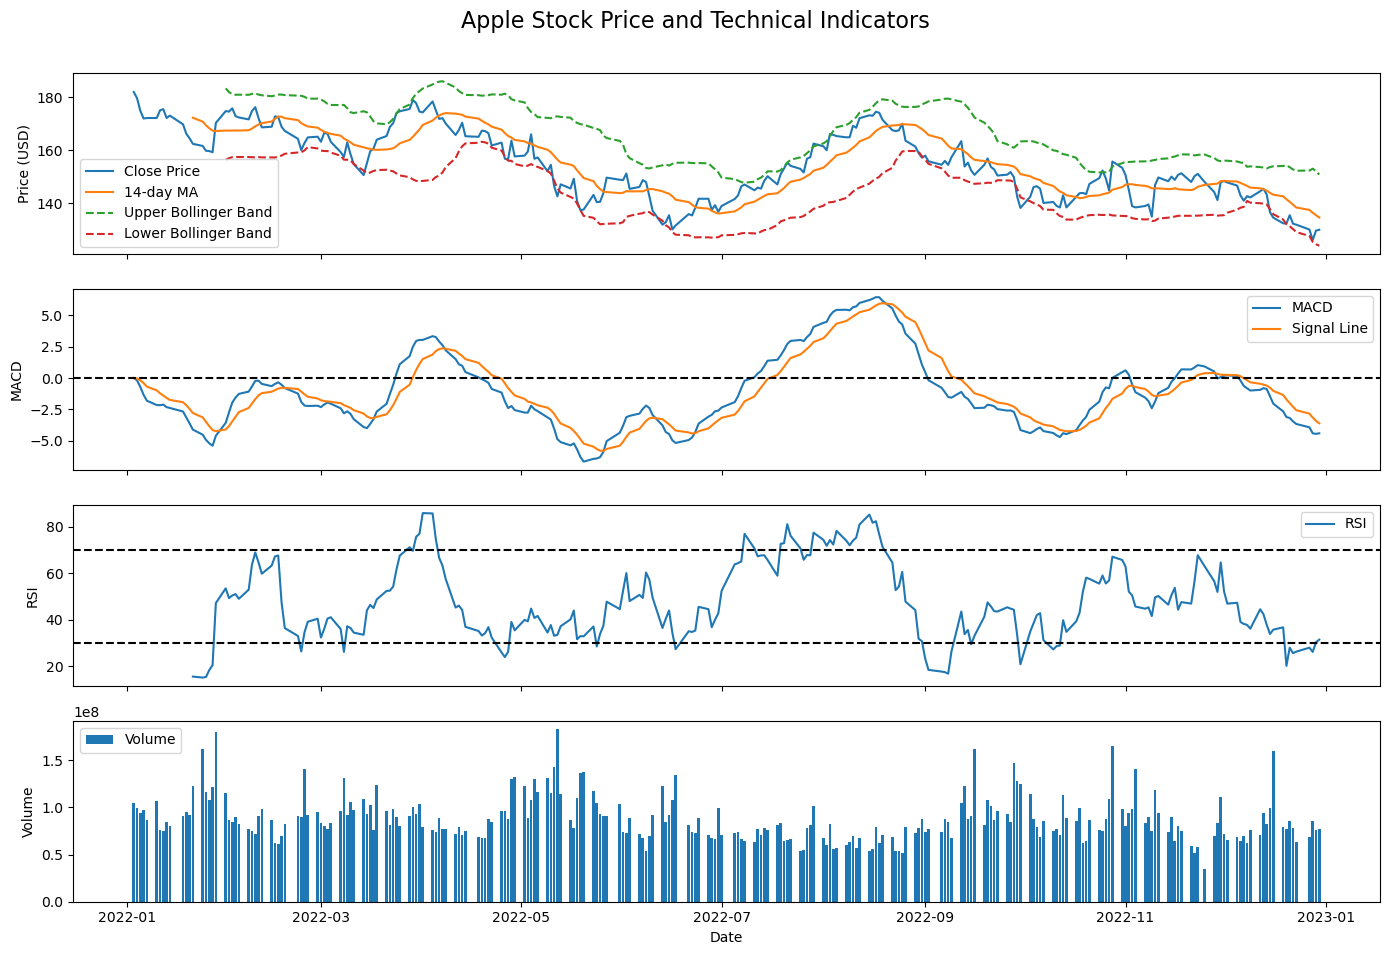

In [21]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Fetch Apple's stock data
aapl = yf.download('AAPL', start='2022-01-01', end='2023-01-01' ,progress=False)

# Calculate Moving Average
aapl['MA'] = aapl['Close'].rolling(window=14).mean()

# Calculate MACD
aapl['EMA12'] = aapl['Close'].ewm(span=12, adjust=False).mean()
aapl['EMA26'] = aapl['Close'].ewm(span=26, adjust=False).mean()
aapl['MACD'] = aapl['EMA12'] - aapl['EMA26']
aapl['Signal_Line'] = aapl['MACD'].ewm(span=9, adjust=False).mean()

# Calculate Bollinger Bands
aapl['Upper_Band'], aapl['Lower_Band'] = aapl['Close'].rolling(window=20).mean() \
+ 2*aapl['Close'].rolling(window=20).std(), aapl['Close'].rolling(window=20).mean() \
- 2*aapl['Close'].rolling(window=20).std()

# Calculate RSI
delta = aapl['Close'].diff()
gain = (delta.where(delta > 0, 0)).fillna(0)
loss = (-delta.where(delta < 0, 0)).fillna(0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
aapl['RSI'] = 100 - (100/(1 + rs))

# Plot graphs wrapping apple stock price
fig, axs = plt.subplots(4, figsize=(14, 10), sharex=True)
fig.suptitle('Apple Stock Price and Technical Indicators', fontsize=16)

# Plot price and Moving Averages
axs[0].plot(aapl['Close'], label='Close Price')
axs[0].plot(aapl['MA'], label='14-day MA')
axs[0].plot(aapl['Upper_Band'], label='Upper Bollinger Band', linestyle='--')
axs[0].plot(aapl['Lower_Band'], label='Lower Bollinger Band', linestyle='--')
axs[0].set_ylabel('Price (USD)')
axs[0].legend()

# plot MACD
axs[1].plot(aapl['MACD'], label='MACD')
axs[1].plot(aapl['Signal_Line'], label='Signal Line')
axs[1].axhline(y=0, color='black', linestyle='--')
axs[1].set_ylabel('MACD')
axs[1].legend()

# plot RSI
axs[2].plot(aapl['RSI'], label='RSI')
axs[2].axhline(y=70, color='black', linestyle='--')
axs[2].axhline(y=30, color='black', linestyle='--')
axs[2].set_ylabel('RSI')
axs[2].legend()

# plot Volume
axs[3].bar(aapl.index, aapl['Volume'], label='Volume')
axs[3].set_ylabel('Volume')
axs[3].legend()

plt.xlabel('Date')
plt.tight_layout(rect=[0, 0.03, 1, 0.97])  # Adjust the padding
plt.show()

---
# 5. Bond

### 5ai. Volatility, Hedging and Diversification to help build trading strategies

In [22]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import dataframe_image as dfi

sector_etfs = ['XLY', 'XLP', 'XLE', 'XLF', 'XLV', 'XLI', 'XLB', 'XLRE', 'XLK', 'XLC']
start = '2020-01-01'
end = '2023-10-01'

treasury_yield = pd.read_csv("https://fred.stlouisfed.org/data/DGS2.txt", sep="\s+", skiprows=30,
                             parse_dates=[0], index_col=[0], na_values=['.'])
treasury_yield = treasury_yield.loc[start:end]

# Store correlations
correlations = {}

# Iterate through each ETF, compute and store the correlation with 2-year Treasury yield
for etf in sector_etfs:
    try:
        # Fetch ETF data
        etf_data = yf.download(etf, start=start, end=end ,progress=False)['Close']
        
        # Merge data
        merged_data = pd.concat([etf_data, treasury_yield], axis=1).dropna()
        merged_data.columns = ['ETF', 'DGS2']
        
        # Compute daily returns
        returns = merged_data.pct_change().dropna()
        
        # Compute and store correlation
        correlation = returns['ETF'].corr(returns['DGS2'])
        correlations[etf] = correlation

    except Exception as e:
        print(f"An error occurred with {etf}: {str(e)}")

# Display correlations in a table
correlations_df1 = pd.DataFrame(list(correlations.items()), columns=['ETF', 'Correlation'])
correlations_df1.sort_values('Correlation', ascending=False , inplace=True)
correlations_df2 = correlations_df1.style.set_caption("Correlation Table")  
correlations_df2

,ETF,Correlation
3,XLF,0.242753
5,XLI,0.196980
2,XLE,0.173969
6,XLB,0.166394
4,XLV,0.136061
1,XLP,0.125789
0,XLY,0.111165
7,XLRE,0.100823
8,XLK,0.097211
9,XLC,0.060744


### 5aii. Sector ETF and 2 Year Treasury Bond Yield

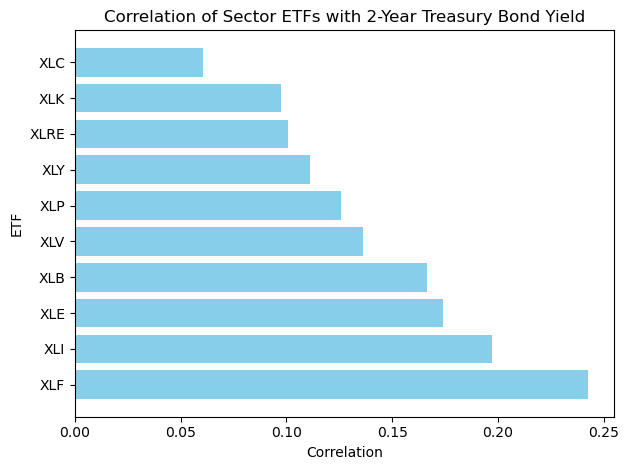

In [23]:
# Visualize correlations
#correlations_df.set_index('ETF').sort_values('Correlation').plot(kind='barh', legend=False)
plt.barh(correlations_df1['ETF'], correlations_df1['Correlation'], color='skyblue')
plt.title('Correlation of Sector ETFs with 2-Year Treasury Bond Yield')
plt.xlabel('Correlation')
plt.ylabel('ETF')
plt.tight_layout()
plt.show()

### 5aiii. XLF ETF and 2 Year Treasury Bond Yield

The ETF most correlated with the 2-year Treasury bond is: XLF (Correlation: 0.24)


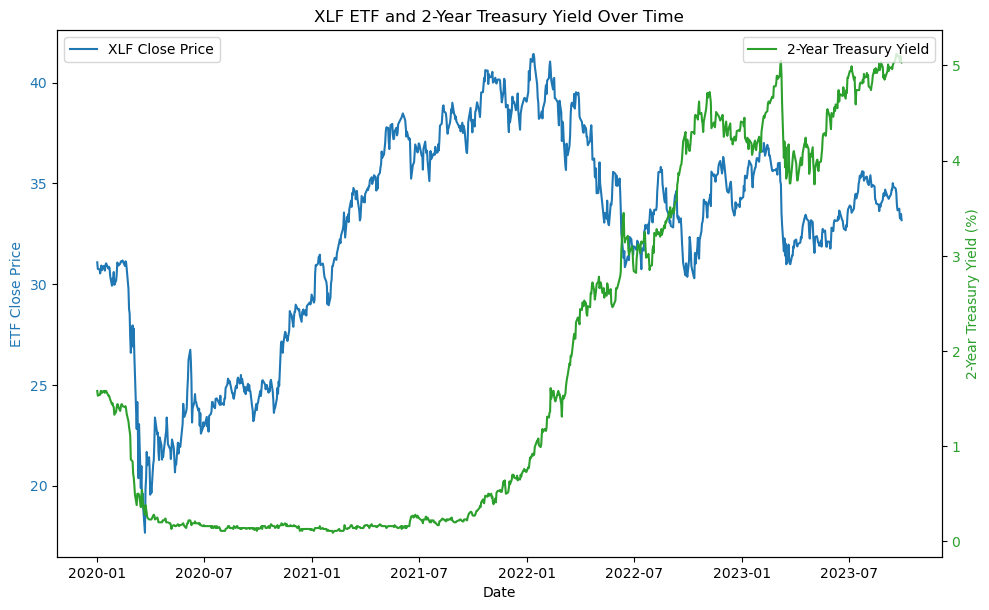

In [24]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the date range
start = '2020-01-01'
end = '2023-10-01'

# Specify a range of sector ETF symbols
sector_etfs = ['XLY', 'XLP', 'XLE', 'XLF', 'XLV', 'XLI', 'XLB', 'XLRE', 'XLK', 'XLC']

# Fetch 2-year Treasury yield data
treasury_yield = pd.read_csv("https://fred.stlouisfed.org/data/DGS2.txt", sep="\s+", skiprows=30,
                             parse_dates=[0], index_col=[0], na_values=['.'])
treasury_yield = treasury_yield.loc[start:end]

# Store correlations
correlations = {}

# Iterate through each ETF, compute and store the correlation with 2-year Treasury yield
for etf in sector_etfs:
    try:
        # Fetch ETF data
        etf_data = yf.download(etf, start=start, end=end ,progress=False)['Close']
        
        # Merge data
        merged_data = pd.concat([etf_data, treasury_yield], axis=1).dropna()
        merged_data.columns = ['ETF', 'DGS2']
        
        # Compute daily returns
        returns = merged_data.pct_change().dropna()
        
        # Compute and store correlation
        correlation = returns['ETF'].corr(returns['DGS2'])
        correlations[etf] = correlation

    except Exception as e:
        print(f"An error occurred with {etf}: {str(e)}")

# Identify ETF with highest correlation
most_correlated_etf = max(correlations, key=correlations.get)
print(f"The ETF most correlated with the 2-year Treasury bond is: {most_correlated_etf} (Correlation: {correlations[most_correlated_etf]:.2f})")

# Fetch data for most correlated ETF
etf_data = yf.download(most_correlated_etf, start=start, end=end ,progress=False)['Close']
merged_data = pd.concat([etf_data, treasury_yield], axis=1).dropna()
merged_data.columns = ['ETF', 'DGS2']

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xlabel('Date')
ax1.set_ylabel('ETF Close Price', color='tab:blue')
ax1.plot(merged_data['ETF'], color='tab:blue', label=f'{most_correlated_etf} Close Price')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('2-Year Treasury Yield (%)', color='tab:green')
ax2.plot(merged_data['DGS2'], color='tab:green', label='2-Year Treasury Yield')
ax2.tick_params(axis='y', labelcolor='tab:green')
ax2.legend(loc='upper right')

fig.tight_layout()  # to ensure the right y-label is not slightly clipped
plt.title(f'{most_correlated_etf} ETF and 2-Year Treasury Yield Over Time')
plt.show()

### 5aiv. SHY ETF and 2 year Treasury Bond Yield

The correlation between SHY and 2-Year Treasury Yield is -0.76


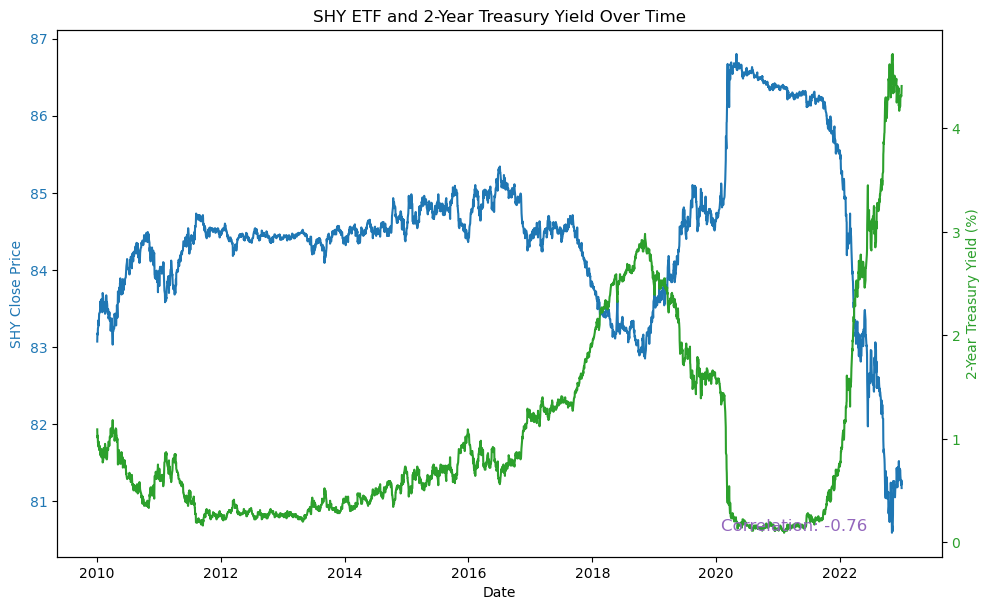

In [25]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Define the date range for data retrieval
start = '2010-01-01'
end = '2023-01-01'

# Symbols for data retrieval
etf_symbol = 'SHY'  

# Fetching data
try:
    shy_data = yf.download(etf_symbol, start=start, end=end ,progress=False)['Close']

    # Fetching bond data directly as a CSV
    treasury_yield = pd.read_csv("https://fred.stlouisfed.org/data/DGS2.txt", sep="\s+", skiprows=30,
                                 parse_dates=[0], index_col=[0], na_values=['.'])

    # Subsetting the treasury yield data to match our date range
    treasury_yield = treasury_yield.loc[start:end]

    # Ensure that both data series are aligned by date
    merged_data = pd.concat([shy_data, treasury_yield], axis=1).dropna()
    merged_data.columns = ['SHY', 'DGS2']

    # Calculating correlation between SHY ETF and 2-Year Treasury Yield
    correlation = merged_data['SHY'].corr(merged_data['DGS2'])
    print(f"The correlation between SHY and 2-Year Treasury Yield is {correlation:.2f}")

    # Plotting
    fig, ax1 = plt.subplots(figsize=(10, 6))

    ax1.set_xlabel('Date')
    ax1.set_ylabel('SHY Close Price', color='tab:blue')
    ax1.plot(merged_data['SHY'], color='tab:blue', label='SHY Close Price')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.set_ylabel('2-Year Treasury Yield (%)', color='tab:green')
    ax2.plot(merged_data['DGS2'], color='tab:green', label='2-Year Treasury Yield')
    ax2.tick_params(axis='y', labelcolor='tab:green')

    # Annotating correlation on the plot
    plt.annotate(f'Correlation: {correlation:.2f}', xy=(0.75, 0.05), xycoords='axes fraction',
                 fontsize=12, color='tab:purple')

    fig.tight_layout()  # to ensure the right y-label is not slightly clipped
    plt.title('SHY ETF and 2-Year Treasury Yield Over Time')
    plt.show()

except Exception as e:
    print(f"An error occurred: {str(e)}")


### 5bi. US Real GDP growth and its components.

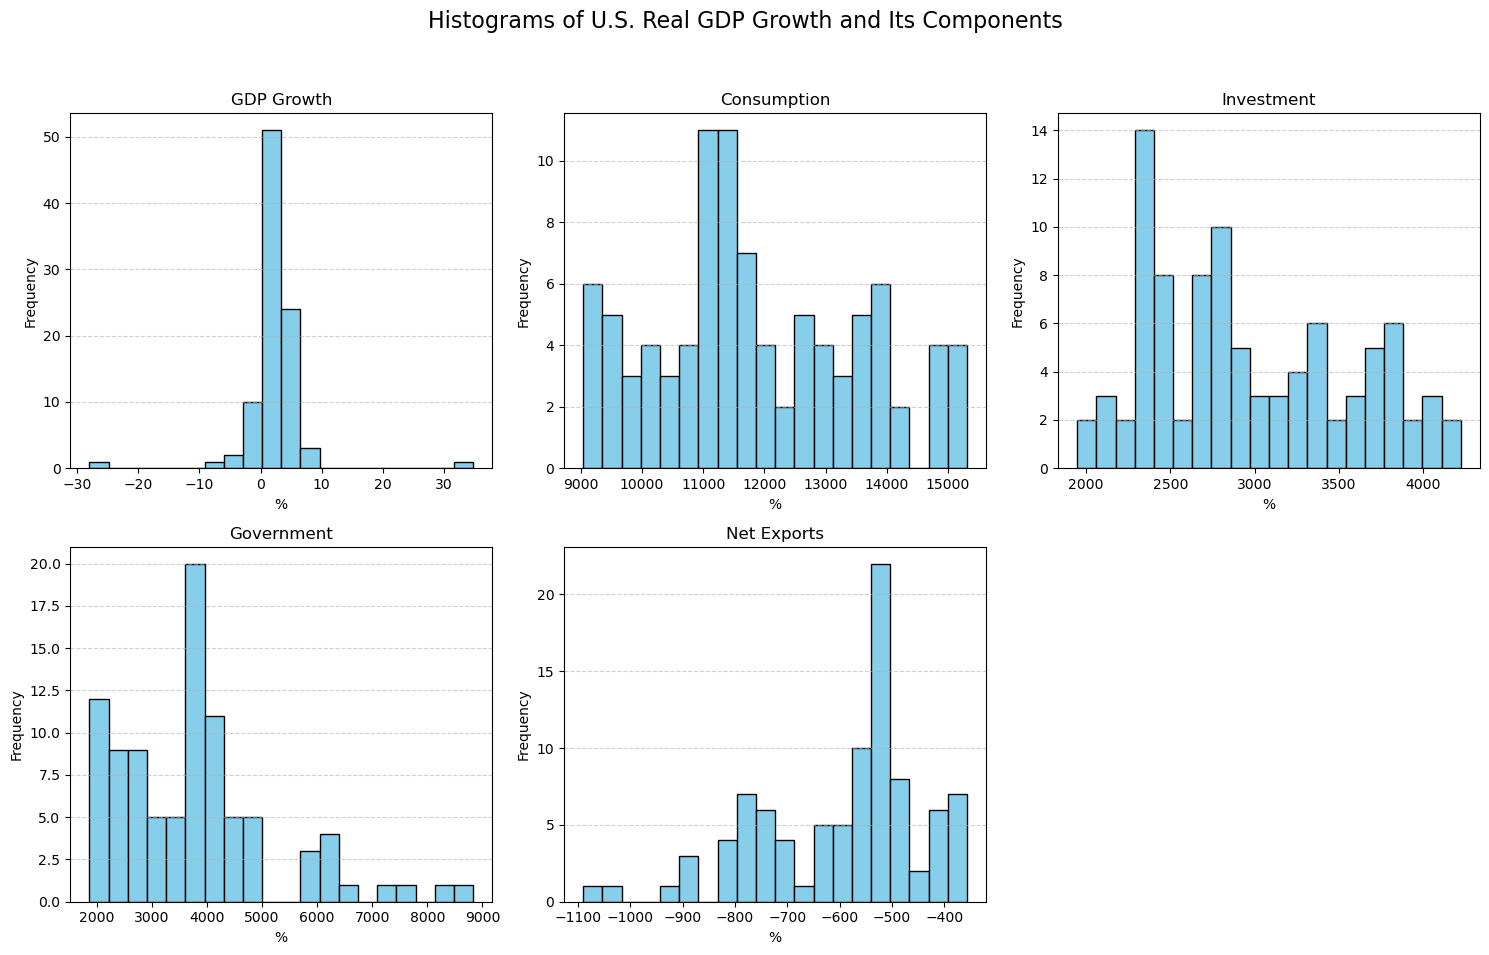

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data

# Define the date range
start_date = '2000-01-01'
end_date = '2023-01-01'

# FRED codes
fred_codes = {
    'GDP Growth': 'A191RL1Q225SBEA',
    'Consumption': 'PCECC96',
    'Investment': 'GPDIC1',
    'Government': 'FGEXPND',
    'Net Exports': 'NETEXP' }

# Fetch data and assemble DataFrame
df = pd.DataFrame()
try:
    for name, code in fred_codes.items():
        fetched_data = data.get_data_fred(code, start=start_date, end=end_date)
        if df.empty:
            df = fetched_data.rename(columns={code: name})
        else:
            df = pd.merge(df, fetched_data.rename(columns={code: name}), left_index=True, right_index=True)
except Exception as e:
    print(f"An error occurred while fetching data: {str(e)}")
    df = None

# Proceed to plotting only if df is defined (data fetched successfully)
if df is not None:
    # Plotting
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('Histograms of U.S. Real GDP Growth and Its Components', fontsize=16)
    # Flatten axs for easy iteration
    axs = axs.flatten()

    # Iterate through the DataFrame columns and axs to create subplots
    for i, (col_name, col_data) in enumerate(df.items()):
        axs[i].hist(col_data.dropna(), bins=20, color='skyblue', edgecolor='black')
        axs[i].set_title(col_name)
        axs[i].set_xlabel('%')
        axs[i].set_ylabel('Frequency')
        axs[i].grid(axis='y', linestyle='--', alpha=0.6)

    # Remove any unused subplots
    for i in range(len(df.columns), len(axs)):
        fig.delaxes(axs[i])
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
else:
    print("Data not available, skipping plot.")


### 5bii. Yearly Stacked of US GDP and its components

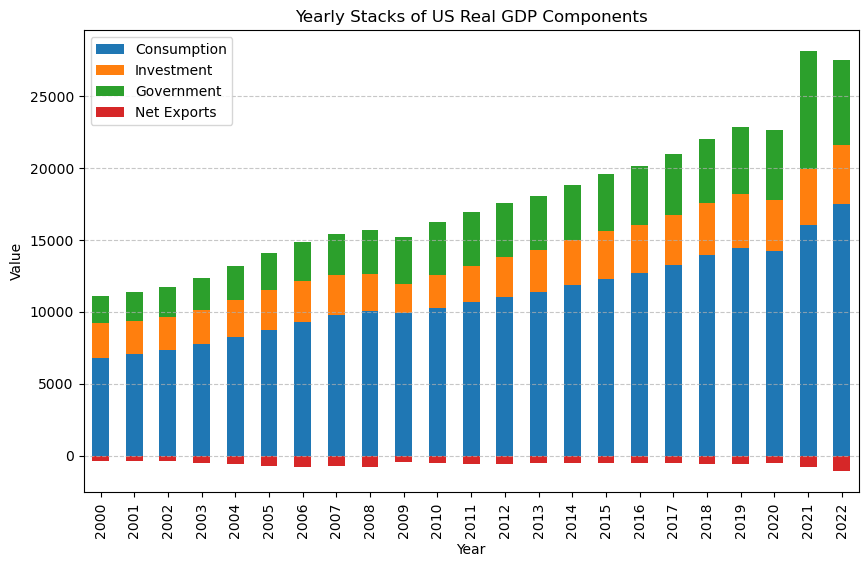

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data

# Define the date range
start_date = '2000-01-01'
end_date = '2023-10-10'

# FRED codes
fred_codes = {
    'Real GDP': 'GDPCA',
    'Consumption': 'PCECA',
    'Investment': 'GPDICA',
    'Government': 'FGEXPND',
    'Net Exports': 'NETEXP' }

# Fetch data and assemble DataFrame
df = pd.DataFrame()
try:
    for name, code in fred_codes.items():
        fetched_data = data.get_data_fred(code, start=start_date, end=end_date)
        if df.empty:
            df = fetched_data.rename(columns={code: name})
        else:
            df = pd.merge(df, fetched_data.rename(columns={code: name}), left_index=True, right_index=True)
except Exception as e:
    print(f"An error occurred while fetching data: {str(e)}")
    df = None

# Proceed to plotting only if df is defined (data fetched successfully)
if df is not None:
    # Remove rows with NaN values for accurate plotting
    df = df.dropna()
    
    # Convert index to year for annual data
    df.index = df.index.year
    
    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))
    df[['Consumption', 'Investment', 'Government', 'Net Exports']].plot(kind='bar', stacked=True, ax=ax)
    
    # Customize the plot
    plt.title('Yearly Stacks of US Real GDP Components')
    plt.ylabel('Value')
    plt.xlabel('Year')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt

In [28]:
df.sort_values('DATE', ascending=False , inplace=True)
df.head(5)

,Real GDP,Consumption,Investment,Government,Net Exports
DATE,,,,,
2022,21822.037,17511.745,4102.807,5928.440,-1089.677
2021,21407.692,16042.964,3914.428,8171.310,-792.417
2020,20234.074,14206.231,3602.497,4870.147,-518.021
2019,20692.087,14417.614,3780.329,4688.509,-598.587
2018,20193.896,13934.442,3668.081,4398.501,-576.031


### 5c. Which countries hold the most U.S. debt?

In [30]:
import requests
import pandas as pd
# import dataframe_image as dfi

url = 'https://ticdata.treasury.gov/Publish/mfh.txt'
response = requests.get(url)
raw_data = response.text.splitlines()
headers = raw_data[8].split()
data_lines = raw_data[12:17]
    
parsed_data = []
for line in data_lines:
    split_line = line.split()
    
    # Check the first word to determine how to parse the country name
    if split_line[0] in ["China", "United"]:
        country_name = " ".join(split_line[:2])
        data_values = split_line[2:]
    elif split_line[0] in ["Japan", "Belgium", "Luxembourg"]:
        country_name = " ".join(split_line[:1])
        data_values = split_line[1:]
    else:
        country_name = " ".join(split_line[:2])
        data_values = split_line[2:]

    parsed_data.append([country_name] + data_values)
        
 # Header
jan_indices = [i for i, x in enumerate(headers) if x == "Jan"]
# Replace the first Jan with Jan 23 and the second Jan with Jan 22
headers[jan_indices[0]] = 'Jan 23'
headers[jan_indices[1]] = 'Jan 22'
new=['country'] + headers
data = pd.DataFrame(parsed_data, columns=new)

# Highlight
def highlight_cells(x):
    # Define a css style
    css = 'background-color: yellow'
    
    # Create a DataFrame of the same shape as `x`, filled with the default style (empty)
    df_highlight = pd.DataFrame('', index=x.index, columns=x.columns)
    
    # Find the row where country is China and apply the highlight to Jan 23 and Jan 22 columns
    mask = x['country'] == 'China, Mainland'
    df_highlight.loc[mask, 'Jan 23'] = css
    df_highlight.loc[mask, 'Jan 22'] = css
    
    return df_highlight

# Styling
styled_df = data.style.apply(highlight_cells, axis=None).set_caption("Foreign Country Holding Us Debt Table")  
styled_df 

,country,Jan 23,Dec,Nov,Oct,Sep,Aug,Jul,Jun,May,Apr,Mar,Feb,Jan 22
0,Japan,1104.4,1076.3,1082.3,1064.4,1116.4,1196.0,1230.7,1232.7,1219.9,1215.0,1229.0,1303.0,1299.9
1,"China, Mainland",859.4,867.1,870.2,877.9,901.7,938.6,939.2,938.8,951.8,976.0,1013.2,1028.7,1033.8
2,United Kingdom,668.3,654.5,645.8,641.3,664.8,646.5,636.6,617.3,636.5,614.3,636.5,627.0,610.7
3,Belgium,331.1,354.3,332.9,327.2,325.0,287.8,285.4,273.5,268.2,255.6,264.5,258.4,243.0
4,Luxembourg,318.2,329.4,311.1,298.4,299.9,308.4,306.5,309.3,296.5,296.2,303.2,316.4,313.0


### 5di. US Trade Export

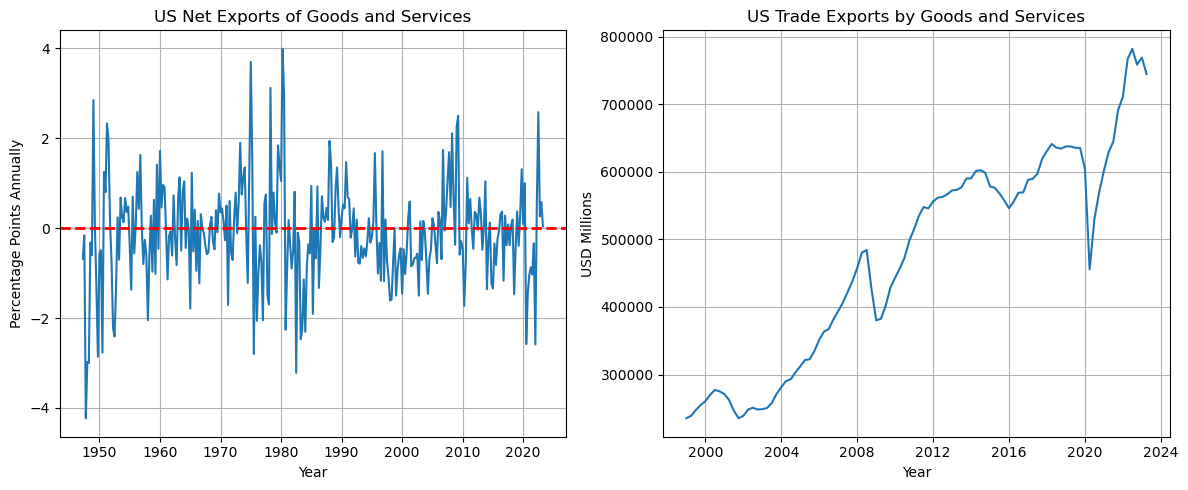

In [32]:
from fredapi import Fred
import pandas as pd
import matplotlib.pyplot as plt

# Your API key
api_key = '7490f681c7eb037113b1a75963b074db'
fred = Fred(api_key=api_key)

# Data Series 1
series_id1 = 'A019RY2Q224SBEA'
data1 = fred.get_series(series_id1)
df1 = pd.DataFrame(data1, columns=['Value'])
df1.index.name = 'Date'

# Data Series 2
series_id2 = 'IEAXGS'
#series_id2 = 'XTEXVA01USM667S' 
data2 = fred.get_series(series_id2)
df2 = pd.DataFrame(data2, columns=['Value'])
df2.index.name = 'Date'

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot Data Series 1
axes[0].plot(df1.index, df1['Value'])
axes[0].axhline(0, color='red', linestyle='--', linewidth=2)
axes[0].set_title('US Net Exports of Goods and Services')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Percentage Points Annually')
axes[0].grid(True)

# Plot Data Series 2
axes[1].plot(df2.index, df2['Value'])
axes[1].set_title('US Trade Exports by Goods and Services')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('USD Millions')
axes[1].grid(True)

# Adjust the layout
plt.tight_layout()
plt.show()

### 5dii. US Trade Import

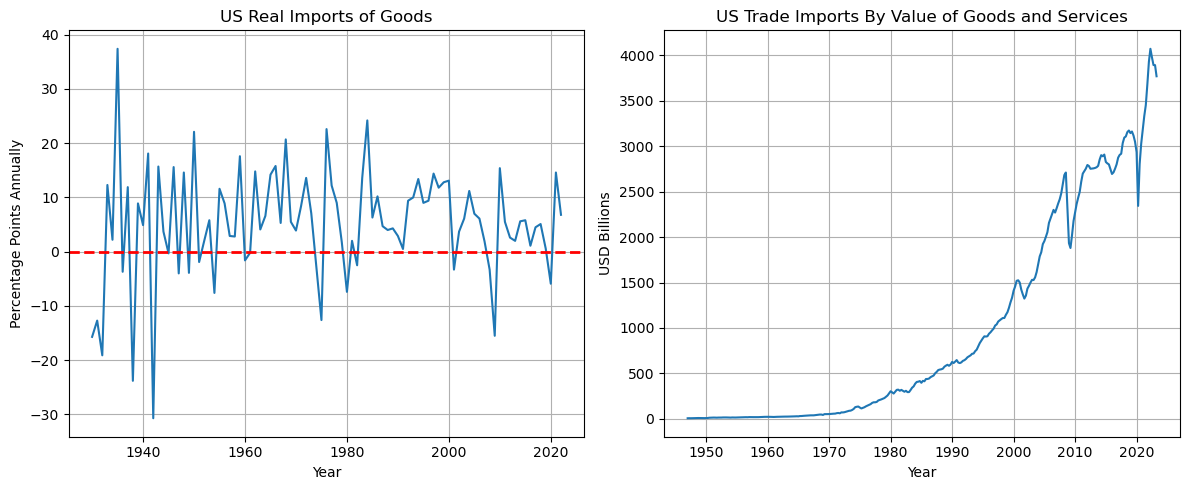

In [33]:
from fredapi import Fred
import pandas as pd
import matplotlib.pyplot as plt

# Your API key
api_key = '7490f681c7eb037113b1a75963b074db'
fred = Fred(api_key=api_key)

# Data Series 1
series_id1 = 'A255RL1A225NBEA' 
data1 = fred.get_series(series_id1)
df1 = pd.DataFrame(data1, columns=['Value'])
df1.index.name = 'Date'

# Data Series 2
series_id2 = 'IMPGS'
data2 = fred.get_series(series_id2)
df2 = pd.DataFrame(data2, columns=['Value'])
df2.index.name = 'Date'

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot Data Series 1
axes[0].plot(df1.index, df1['Value'])
axes[0].axhline(0, color='red', linestyle='--', linewidth=2)
axes[0].set_title('US Real Imports of Goods')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Percentage Points Annually')
axes[0].grid(True)

# Plot Data Series 2
axes[1].plot(df2.index, df2['Value'])
axes[1].set_title('US Trade Imports By Value of Goods and Services')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('USD Billions')
axes[1].grid(True)

# Adjust the layout
plt.tight_layout()
plt.show()

# SCENARIO 6

In [6]:
df = pd.read_csv('Real_Estate_Sales_2001-2020_GL.csv')

C:\Users\EBEN\AppData\Local\Temp\ipykernel_12500\1766759599.py:1: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Real_Estate_Sales_2001-2020_GL.csv')


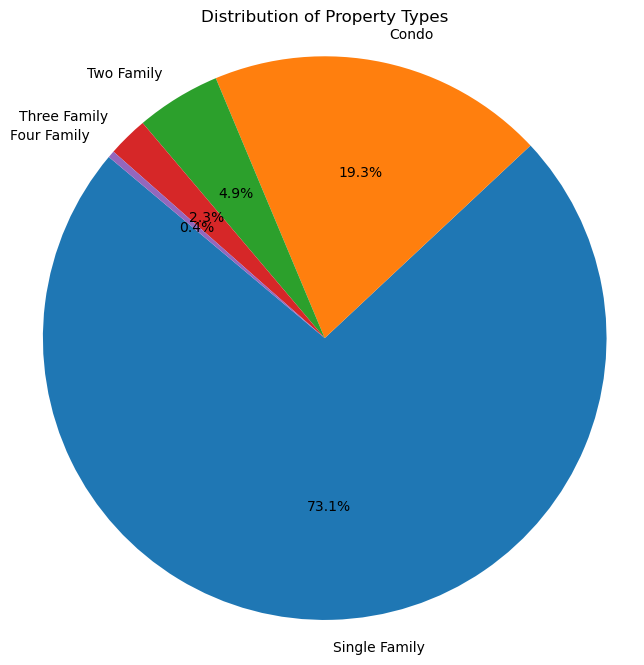

In [7]:
property_counts = df['Residential Type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(property_counts, labels=property_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Distribution of Property Types")
plt.axis("equal")  

plt.show()

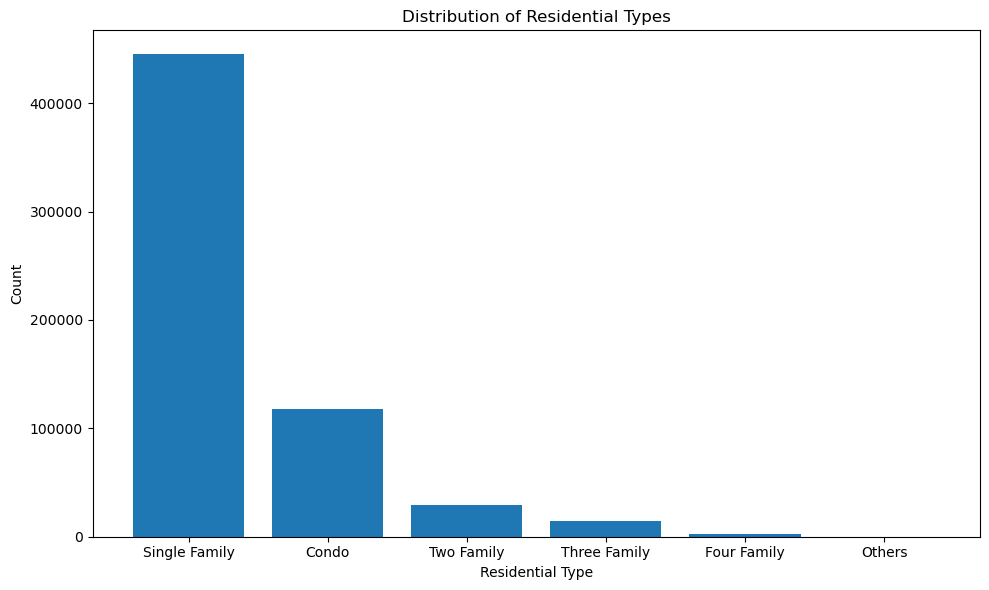

In [8]:
def bar_chart(data, column, title, figscale=1, limit=5):
    # Count the unique values in the specified column
    value_counts = data[column].value_counts()

    # Extract labels and values, keeping only the top 'limit' values
    labels = value_counts.index.tolist()[:limit]
    values = value_counts.tolist()[:limit]

    # Sum the counts of the values beyond the 'limit' and create an 'Others' category
    others_count = sum(value_counts.tolist()[limit:])
    labels.append('Others')
    values.append(others_count)

    plt.figure(figsize=(10 * figscale, 6 * figscale))
    plt.bar(labels, values)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

# Example usage with your DataFrame 'df' and the column 'Property Type' to create a bar chart
bar_chart(df, column='Residential Type', title='Distribution of Residential Types', limit=5)


property_counts = df['Residential Type'].value_counts()